# Tarea #3 Filtros
## Integrantes
* Gabriela María Castro Beltrán
* Juan Nicolas Carvajal Useche

Primero, se importan las librerías e imágenes requeridas para el desarrollo del taller.

In [10]:
# Importar librerias
import os
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.multiarray import dtype
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance
from pylab import *
import pandas as pd
import matplotlib.pyplot as plt
import findpeaks
import matplotlib.pyplot as plt
# Importar imágenes
pare = cv2.imread("pare.jpg", cv2.IMREAD_COLOR)
pare = cv2.cvtColor(pare, cv2.COLOR_BGR2RGB)

carro_ia = cv2.imread("carro.jpeg", cv2.IMREAD_COLOR)
carro_ia = cv2.cvtColor(carro_ia, cv2.COLOR_BGR2RGB)

hombre_ia = cv2.imread("hombre.jpeg", cv2.IMREAD_COLOR)
hombre_ia = cv2.cvtColor(hombre_ia, cv2.COLOR_BGR2RGB)


<ipython-input-10-4e951c490439>:8: DeprecationWarning: Please use `uniform_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter
<ipython-input-10-4e951c490439>:9: DeprecationWarning: Please use `variance` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import variance


In [9]:
!pip install findpeaks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=703ca6479a8a9b7b95a937a876e5d2467ee53f3b1d737f7b31cd91f4b10981e1
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


## Ruido Multiplicativo

Se crea la función de ruido con una intensidad personalizada

In [11]:
# Define la intensidad del ruido (ajusta según tus preferencias)

def ruido(inte_r,img):
  # Genera ruido blanco con una distribución normal
  alto, ancho, canales = img.shape
  ruido = np.random.normal(0, inte_r, (alto, ancho, canales))

  # Añade el ruido a la imagen
  imagen_con_ruido = np.clip(img + img*ruido, 0, 255).astype(np.uint8)
  return imagen_con_ruido

Se usan sobre 3 imágenes, una de un carro (imagen real), una foto de un símbolo "pare" (imagen real) y una imagen creada artificialmente de un hombre en un cruce de cebra (imagen sintética creada por IA), se ajustan a estos diferentes niveles de ruido.

Text(0.5, 1.0, 'Imagen con ruido 2')

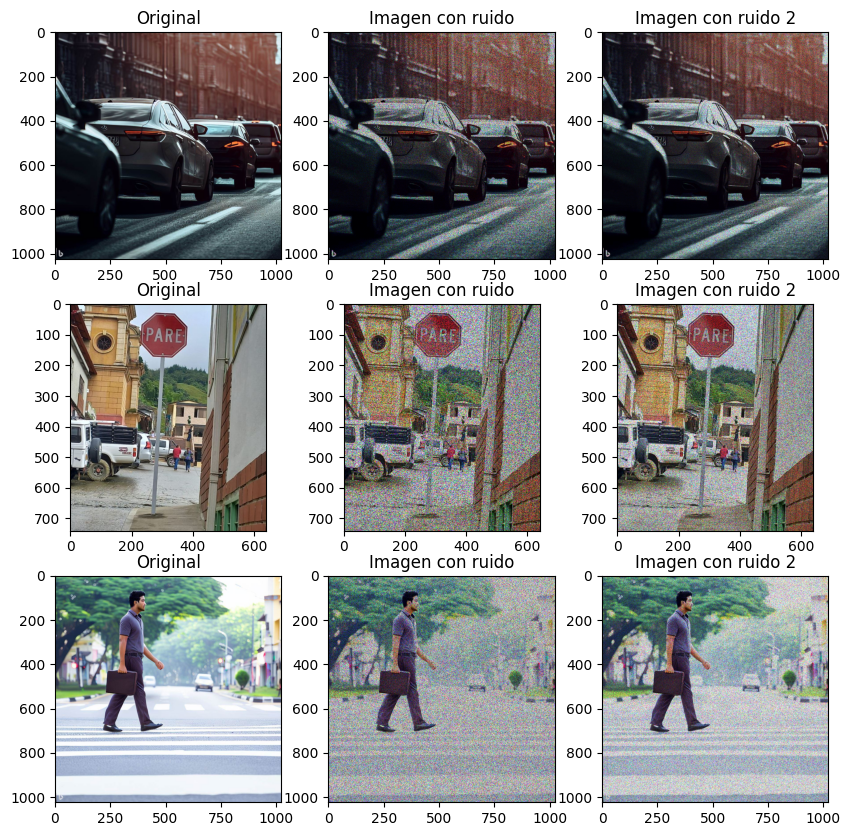

In [12]:
carro_ia = cv2.imread("carro.jpeg", cv2.IMREAD_COLOR)
carro_ia = cv2.cvtColor(carro_ia, cv2.COLOR_BGR2RGB)
carro_ia_gris = cv2.cvtColor(carro_ia, cv2.COLOR_BGR2GRAY)

pare = cv2.imread("pare.jpg", cv2.IMREAD_COLOR)
pare = cv2.cvtColor(pare, cv2.COLOR_BGR2RGB)
pare_gris = cv2.cvtColor(pare, cv2.COLOR_BGR2GRAY)

hombre = cv2.imread("hombre.jpeg", cv2.IMREAD_COLOR)
hombre_ia = cv2.cvtColor(hombre, cv2.COLOR_BGR2RGB)
hombre_ia_gris = cv2.cvtColor(hombre_ia, cv2.COLOR_BGR2GRAY)

Img_rc_car=ruido(1,carro_ia)
Img_rc_p=ruido(1,pare)
Img_rc_h=ruido(1,hombre_ia)

Img_rc_car2=ruido(0.5,carro_ia)
Img_rc_p2=ruido(0.5,pare)
Img_rc_h2=ruido(0.5,hombre_ia)

plt.figure(figsize=[10, 10])
plt.subplot(331);plt.imshow(carro_ia,cmap='gray'); plt.title("Original")
plt.subplot(332);plt.imshow(Img_rc_car); plt.title("Imagen con ruido")
plt.subplot(333);plt.imshow(Img_rc_car2); plt.title("Imagen con ruido 2")
plt.subplot(334);plt.imshow(pare,cmap='gray'); plt.title("Original")
plt.subplot(335);plt.imshow(Img_rc_p,cmap='gray'); plt.title("Imagen con ruido")
plt.subplot(336);plt.imshow(Img_rc_p2,cmap='gray'); plt.title("Imagen con ruido 2")
plt.subplot(337);plt.imshow(hombre_ia,cmap='gray'); plt.title("Original")
plt.subplot(338);plt.imshow(Img_rc_h,cmap='gray'); plt.title("Imagen con ruido")
plt.subplot(339);plt.imshow(Img_rc_h2,cmap='gray'); plt.title("Imagen con ruido 2")

## Filtros de reducción de ruido Speckle

### Filtro de Lee (implementación a mano)



Se prueba el filtro de Lee implementado en clase con el modelo matemático

In [13]:
def lee_filter(img, size):
    img_mean = uniform_filter(img, (size, size)) #yij_barra
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2 #sigma_cuadrado_yij
    overall_variance = variance(img)
    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean  + img_weights * (img - img_mean)
    return img_output

def lee_filter_color(img, size):
    R,G,B=cv2.split(img)
    r=np.array(lee_filter(R,size),dtype='uint8')
    g=np.array(lee_filter(G,size),dtype='uint8')
    b=np.array(lee_filter(B,size),dtype='uint8')

    img_color=cv2.merge((r,g,b))
    return img_color

Text(0.5, 1.0, 'Filtro de lee 2')

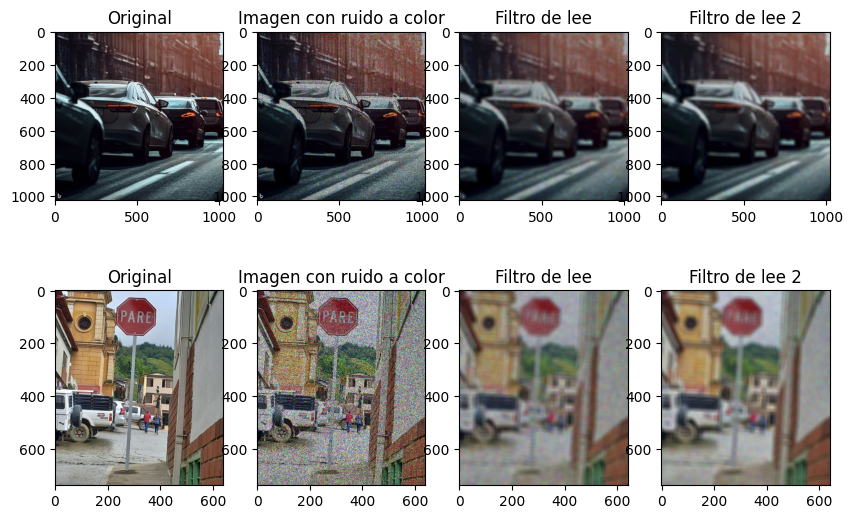

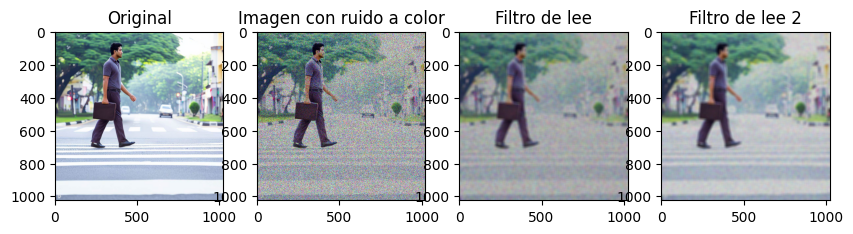

In [14]:
Img_lee_car=lee_filter_color(Img_rc_car,20)
Img_lee_p=lee_filter_color(Img_rc_p,20)
Img_lee_h=lee_filter_color(Img_rc_h,20)

Img_lee_car2=lee_filter_color(Img_rc_car2,20)
Img_lee_p2=lee_filter_color(Img_rc_p2,20)
Img_lee_h2=lee_filter_color(Img_rc_h2,20)

plt.figure(figsize=[10, 10])
plt.subplot(341);plt.imshow(carro_ia,cmap='gray'); plt.title("Original")
plt.subplot(342);plt.imshow(Img_rc_car,cmap='gray'); plt.title("Imagen con ruido a color")
plt.subplot(343);plt.imshow(Img_lee_car,cmap='gray'); plt.title("Filtro de lee")
plt.subplot(344);plt.imshow(Img_lee_car2,cmap='gray'); plt.title("Filtro de lee 2")
plt.subplot(345);plt.imshow(pare,cmap='gray'); plt.title("Original")
plt.subplot(346);plt.imshow(Img_rc_p,cmap='gray'); plt.title("Imagen con ruido a color")
plt.subplot(347);plt.imshow(Img_lee_p,cmap='gray'); plt.title("Filtro de lee")
plt.subplot(348);plt.imshow(Img_lee_p2,cmap='gray'); plt.title("Filtro de lee 2")

plt.figure(figsize=[10, 10])
plt.subplot(141);plt.imshow(hombre_ia,cmap='gray'); plt.title("Original")
plt.subplot(142);plt.imshow(Img_rc_h,cmap='gray'); plt.title("Imagen con ruido a color")
plt.subplot(143);plt.imshow(Img_lee_h,cmap='gray'); plt.title("Filtro de lee")
plt.subplot(144);plt.imshow(Img_lee_h2,cmap='gray'); plt.title("Filtro de lee 2")

### Filtro de Lee

Se implementa con la librería importada para cada canal de color

In [15]:
# filters parameters
def filter_lee(img,w,cu):
  # lee filter
  image_lee = findpeaks.lee_filter(img, w, cu)

  return image_lee

def filter_lee_color(img,w,cu):
  R,G,B=cv2.split(img)
  r=np.array(filter_lee(R,w,cu),dtype='uint8')
  g=np.array(filter_lee(G,w,cu),dtype='uint8')
  b=np.array(filter_lee(B,w,cu),dtype='uint8')

  img_color=cv2.merge((r,g,b))

  return img_color

Se aplica el filtro de Lee de la librería en cada imagen

Text(0.5, 1.0, 'Filtro de lee 2')

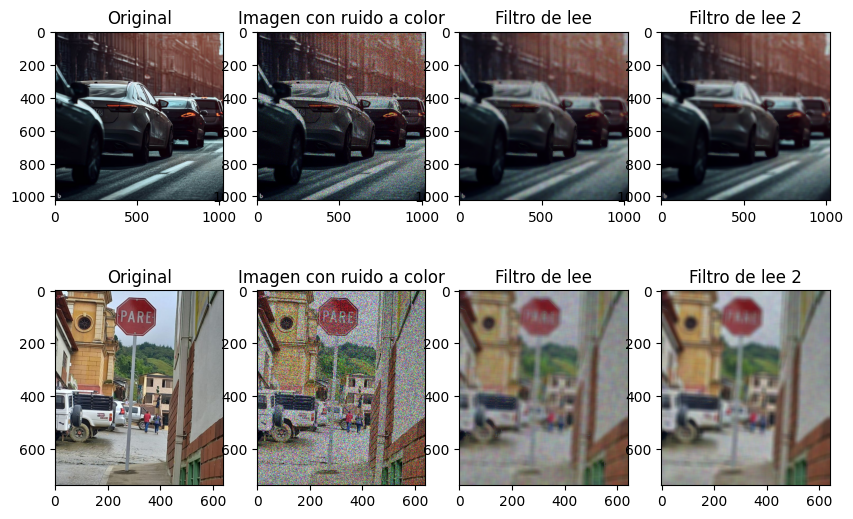

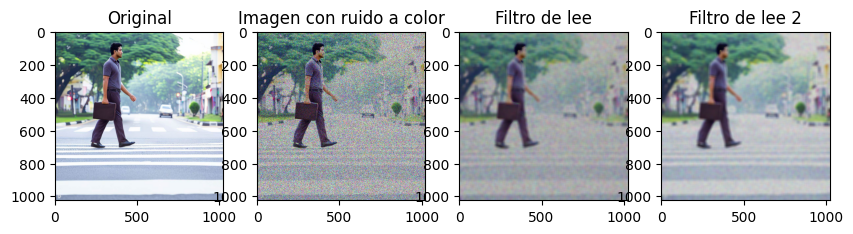

In [16]:
# window size
w = 21
# coefficient of variation of noise
cu = 1

Img_lee2_car=filter_lee_color(Img_rc_car,w,cu)
Img_lee2_p=filter_lee_color(Img_rc_p,w,cu)
Img_lee2_h=filter_lee_color(Img_rc_h,w,cu)

Img_lee2_car2=filter_lee_color(Img_rc_car2,w,cu)
Img_lee2_p2=filter_lee_color(Img_rc_p2,w,cu)
Img_lee2_h2=filter_lee_color(Img_rc_h2,w,cu)

plt.figure(figsize=[10, 10])
plt.subplot(341);plt.imshow(carro_ia,cmap='gray'); plt.title("Original")
plt.subplot(342);plt.imshow(Img_rc_car,cmap='gray'); plt.title("Imagen con ruido a color")
plt.subplot(343);plt.imshow(Img_lee2_car,cmap='gray'); plt.title("Filtro de lee")
plt.subplot(344);plt.imshow(Img_lee2_car2,cmap='gray'); plt.title("Filtro de lee 2")
plt.subplot(345);plt.imshow(pare,cmap='gray'); plt.title("Original")
plt.subplot(346);plt.imshow(Img_rc_p,cmap='gray'); plt.title("Imagen con ruido a color")
plt.subplot(347);plt.imshow(Img_lee2_p,cmap='gray'); plt.title("Filtro de lee")
plt.subplot(348);plt.imshow(Img_lee2_p2,cmap='gray'); plt.title("Filtro de lee 2")

plt.figure(figsize=[10, 10])
plt.subplot(141);plt.imshow(hombre_ia,cmap='gray'); plt.title("Original")
plt.subplot(142);plt.imshow(Img_rc_h,cmap='gray'); plt.title("Imagen con ruido a color")
plt.subplot(143);plt.imshow(Img_lee2_h,cmap='gray'); plt.title("Filtro de lee")
plt.subplot(144);plt.imshow(Img_lee2_h2,cmap='gray'); plt.title("Filtro de lee 2")

### Filtro de Kuan

De la misma manera, se implementa el filtro de Kuan de la librería para cada canal de color

In [17]:

def filter_kuan(img,w,cu):
  # kuan filter
  image_kuan = findpeaks.kuan_filter(img, w,cu)

  return image_kuan

def filter_kuan_color(img,w,cu):

  R,G,B=cv2.split(img)
  r=np.array(filter_kuan(R,w,cu),dtype='uint8')
  g=np.array(filter_kuan(G,w,cu),dtype='uint8')
  b=np.array(filter_kuan(B,w,cu),dtype='uint8')

  img_color=cv2.merge((r,g,b))

  img_color = findpeaks.stats.togray(img_color)

  return img_color


Se aplica el filtro de Kuan para cada imagen

[findpeaks] >Conversion to gray image.
[findpeaks] >Conversion to gray image.
[findpeaks] >Conversion to gray image.
[findpeaks] >Conversion to gray image.
[findpeaks] >Conversion to gray image.
[findpeaks] >Conversion to gray image.


Text(0.5, 1.0, 'Filtro de Kuan 2')

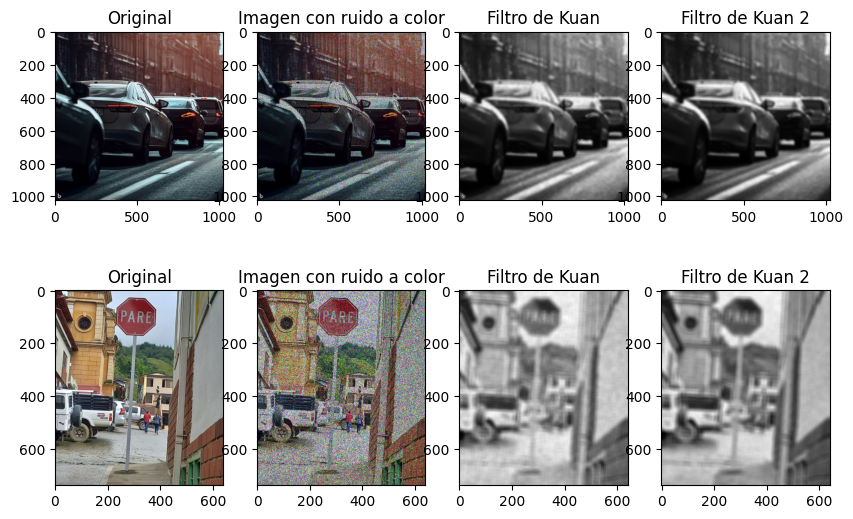

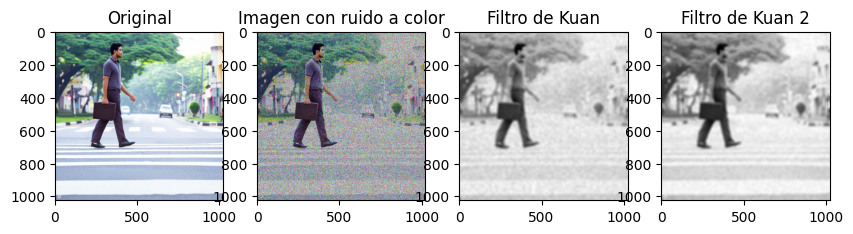

In [18]:
# filters parameters
# window size
w= 21
# coefficient of variation of noise
cu = 1

Img_kuan_car=filter_kuan_color(Img_rc_car,w,cu)
Img_kuan_p=filter_kuan_color(Img_rc_p,w,cu)
Img_kuan_h=filter_kuan_color(Img_rc_h,w,cu)

Img_kuan_car2=filter_kuan_color(Img_rc_car2,w,cu)
Img_kuan_p2=filter_kuan_color(Img_rc_p2,w,cu)
Img_kuan_h2=filter_kuan_color(Img_rc_h2,w,cu)

plt.figure(figsize=[10, 10])
plt.subplot(341);plt.imshow(carro_ia,cmap='gray'); plt.title("Original")
plt.subplot(342);plt.imshow(Img_rc_car,cmap='gray'); plt.title("Imagen con ruido a color")
plt.subplot(343);plt.imshow(Img_kuan_car,cmap='gray'); plt.title("Filtro de Kuan")
plt.subplot(344);plt.imshow(Img_kuan_car2,cmap='gray'); plt.title("Filtro de Kuan 2")
plt.subplot(345);plt.imshow(pare,cmap='gray'); plt.title("Original")
plt.subplot(346);plt.imshow(Img_rc_p,cmap='gray'); plt.title("Imagen con ruido a color")
plt.subplot(347);plt.imshow(Img_kuan_p,cmap='gray'); plt.title("Filtro de Kuan")
plt.subplot(348);plt.imshow(Img_kuan_p2,cmap='gray'); plt.title("Filtro de Kuan 2")

plt.figure(figsize=[10, 10])
plt.subplot(141);plt.imshow(hombre_ia,cmap='gray'); plt.title("Original")
plt.subplot(142);plt.imshow(Img_rc_h,cmap='gray'); plt.title("Imagen con ruido a color")
plt.subplot(143);plt.imshow(Img_kuan_h,cmap='gray'); plt.title("Filtro de Kuan")
plt.subplot(144);plt.imshow(Img_kuan_h2,cmap='gray'); plt.title("Filtro de Kuan 2")

### Filtro Frost

Se implementa el filtro de la librería de frost para cada canal de color

In [19]:
def filter_frost(img,k,w):
  # frost filter
  image_frost = findpeaks.frost_filter(img, k, w)

  return image_frost

def filter_frost_color(img,k,w):

  R,G,B=cv2.split(img)
  r=np.array(filter_frost(R,k,w),dtype='uint8')
  g=np.array(filter_frost(G,k,w),dtype='uint8')
  b=np.array(filter_frost(B,k,w),dtype='uint8')

  img_color=cv2.merge((r,g,b))

  return img_color


Se aplica el filtro a la imagen

Text(0.5, 1.0, 'Filtro de Frost 2')

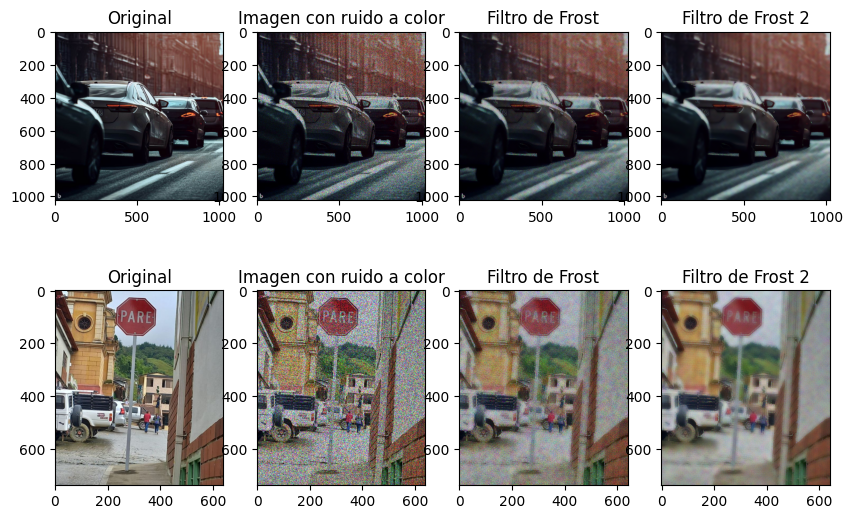

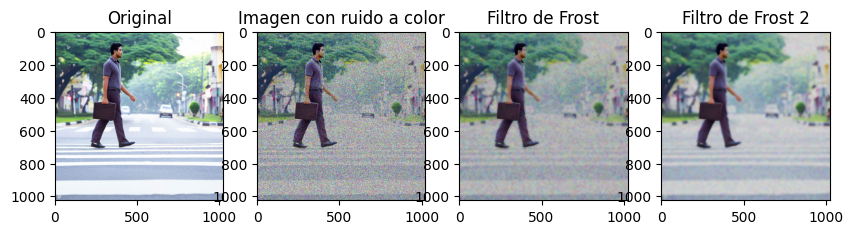

In [20]:
# filters parameters
# window size
w = 21
# damping factor for frost
k= 1

Img_frost_car=filter_frost_color(Img_rc_car,k,w)
Img_frost_p=filter_frost_color(Img_rc_p,k,w)
Img_frost_h=filter_frost_color(Img_rc_h,k,w)

Img_frost_car2=filter_frost_color(Img_rc_car2,k,w)
Img_frost_p2=filter_frost_color(Img_rc_p2,k,w)
Img_frost_h2=filter_frost_color(Img_rc_h2,k,w)

plt.figure(figsize=[10, 10])
plt.subplot(341);plt.imshow(carro_ia,cmap='gray'); plt.title("Original")
plt.subplot(342);plt.imshow(Img_rc_car,cmap='gray'); plt.title("Imagen con ruido a color")
plt.subplot(343);plt.imshow(Img_frost_car,cmap='gray'); plt.title("Filtro de Frost")
plt.subplot(344);plt.imshow(Img_frost_car2,cmap='gray'); plt.title("Filtro de Frost 2")
plt.subplot(345);plt.imshow(pare,cmap='gray'); plt.title("Original")
plt.subplot(346);plt.imshow(Img_rc_p,cmap='gray'); plt.title("Imagen con ruido a color")
plt.subplot(347);plt.imshow(Img_frost_p,cmap='gray'); plt.title("Filtro de Frost")
plt.subplot(348);plt.imshow(Img_frost_p2,cmap='gray'); plt.title("Filtro de Frost 2")

plt.figure(figsize=[10, 10])
plt.subplot(141);plt.imshow(hombre_ia,cmap='gray'); plt.title("Original")
plt.subplot(142);plt.imshow(Img_rc_h,cmap='gray'); plt.title("Imagen con ruido a color")
plt.subplot(143);plt.imshow(Img_frost_h,cmap='gray'); plt.title("Filtro de Frost")
plt.subplot(144);plt.imshow(Img_frost_h2,cmap='gray'); plt.title("Filtro de Frost 2")

## Técnicas de estimación del nivel de ruido

### Relación señal a ruido (SNR)

El parámetro SNR (Signal to Noise Ratio), se define como el
cociente entre la media de los niveles digitales y su desviación
típica.

In [1]:
def SNR2(a, axis=None, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

def SNR(img):
    m=mean(img)
    sd = std(img)
    return m/sd

### Número equivalente de vistas (ENL).

In [2]:
def ENL(img):
    m=mean(img)
    sd = std(img)
    return (m/sd)**2

### Indice de supresión de speckle (SSI).

In [3]:
def SSI(img, img_filtered):
    m=mean(img)
    mf=mean(img_filtered)
    sd = std(img)
    sdf = std(img_filtered)
    SSI = (sdf*m)/(mf*sd)
    return SSI

### Indice de preservado de la media y supresión del ruido speckle (SMPI).

In [4]:
def SMPI(img, img_filtered):
    mo = 1 + abs(mean(img/255)-mean(img_filtered))
    SMPI = mo*std(img_filtered)/std(img)
    return SMPI

### Factor de calidad (Q).

In [5]:
def Q(img, img_filtered):
    ys = mean(img)-abs(mean(img)-mean(img_filtered))
    var = variance(img_filtered)
    Lo=ENL(img)
    Q = (ys**2)/(Lo*var)
    return Q

## Análisis de desempeño de los filtros utilizados

Ahora, se calcularán las estimaciones de nivel de ruido e índices de desempeño para cada caso. En el caso de SNR y ENL, se tomó el cambio (delta) de este valor respecto a la imagen orignial.

In [31]:
def filter_stats(img,image_kuan,image_lee,image_frost,image_kuan2,image_lee2,image_frost2):
    d = [ ["Q", Q(img,image_kuan),Q(img,image_lee),Q(img,image_frost),Q(img,image_kuan2),Q(img,image_lee2),Q(img,image_frost2)],
     ["SMPI", SMPI(img,image_kuan),SMPI(img,image_lee),SMPI(img,image_frost),SMPI(img,image_kuan2),SMPI(img,image_lee2),SMPI(img,image_frost2)],
     ["SSI", SSI(img,image_kuan),SSI(img,image_lee),SSI(img,image_frost),SSI(img,image_kuan2),SSI(img,image_lee2),SSI(img,image_frost2)],
      ["ΔSNR", SNR(image_kuan)-SNR(img),SNR(image_lee)-SNR(img),SNR(image_frost)-SNR(img), SNR(image_kuan2)-SNR(img),SNR(image_lee2)-SNR(img),SNR(image_frost2)-SNR(img)],
      ["ΔENL", ENL(image_kuan)-ENL(img),ENL(image_lee)-ENL(img),ENL(image_frost)-ENL(img),ENL(image_kuan2)-ENL(img),ENL(image_lee2)-ENL(img),ENL(image_frost2)-ENL(img)]]
    df = pd.DataFrame(d, columns = ['Índice','Kuan','Lee','Frost','Kuan ruido2','Lee ruido2','Frost ruido2'])
    return df

Estadísticas para el filtrado de la imagen del carro con nivel de ruido inicial de ___ (imagen real)

In [32]:
print(filter_stats(Img_rc_car,Img_kuan_car,Img_lee_car,Img_frost_car,Img_kuan_car2,Img_lee_car2,Img_frost_car2))

  Índice       Kuan        Lee      Frost  Kuan ruido2  Lee ruido2  \
0      Q   2.929915   2.791064   1.870629     2.469663    2.392648   
1   SMPI  35.851199  38.416351  42.268343    38.397644   41.483484   
2    SSI   0.584215   0.571807   0.731149     0.636328    0.613512   
3   ΔSNR   0.601920   0.633334   0.310990     0.483360    0.532788   
4   ΔENL   1.380454   1.472397   0.622755     1.051239    1.185074   

   Frost ruido2  
0      2.115797  
1     40.625292  
2      0.687485  
3      0.384459  
4      0.798122  


Estadísticas para el filtrado de la imagen del pare con nivel de ruido inicial de ___ (imagen real)

In [29]:
print(filter_stats(Img_rc_p,Img_kuan_p,Img_lee_p,Img_frost_p,Img_kuan_p2,Img_lee_p2,Img_frost_p2))

  Índice       Kuan        Lee      Frost  Kuan ruido 2  Lee ruido 2  \
0      Q   8.848435   8.463162   3.319751      5.766767     5.225319   
1   SMPI  38.690459  40.321771  62.591589     48.796136    51.166372   
2    SSI   0.336176   0.341673   0.548842      0.391753     0.394222   
3   ΔSNR   2.447745   2.388423   1.018970      1.924628     1.904818   
4   ΔENL  12.059882  11.625919   3.564523      8.475716     8.350740   

   Frost ruido 2  
0       4.249451  
1      56.855250  
2       0.459255  
3       1.459546  
4       5.748770  


Estadísticas para el filtrado de la imagen del hombre con nivel de ruido inicial de ___ (imagen sintética)

In [30]:
print(filter_stats(Img_rc_h,Img_kuan_h,Img_lee_h,Img_frost_h,Img_kuan_h2,Img_lee_h2,Img_frost_h2))

  Índice       Kuan        Lee      Frost  Kuan ruido 2  Lee ruido 2  \
0      Q   9.305927   8.509335   3.924840      4.086786     3.816659   
1   SMPI  47.348980  49.524792  72.881014     70.300570    72.982714   
2    SSI   0.319922   0.342763   0.482713      0.383789     0.407974   
3   ΔSNR   3.037221   2.739611   1.531102      2.294031     2.073340   
4   ΔENL  17.903680  15.334005   6.719448     11.817854    10.223381   

   Frost ruido 2  
0       3.260201  
1      78.888263  
2       0.437700  
3       1.835491  
4       8.614009  


Estas métricas se utilizan comúnmente en el procesamiento de imágenes para evaluar la calidad de una imagen filtrada o procesada en comparación con la imagen original. A continuación, se realiza un análisis de estos datos :

* El índice Q mide la calidad general de la imagen procesada en comparación con la imagen original. En general, cuanto mayor sea el valor de Q, mejor será la calidad de la imagen. Los valores más altos en Kuan y Lee indican una mejor calidad de imagen que Frost en todas las imágenes evaluadas.

* El SMPI mide cuánta información fotométrica se conserva en la imagen procesada en comparación con la imagen original. Valores más altos indican una mejor conservación de información. En este caso, Frost tiene valores más altos de SMPI, lo que sugiere que conserva mejor la información fotométrica en comparación con Kuan y Lee.

* El SSI mide la capacidad de un filtro para suprimir el ruido speckle. Valores más altos indican una mejor supresión del ruido speckle. En este caso, Frost tiene valores más altos de SSI en todas las imágenes, lo que sugiere que es más efectivo en la supresión del ruido speckle.

* ΔSNR mide el cambio en la relación señal-ruido en la imagen procesada en comparación con la imagen original. Un valor positivo indica una mejora en la relación señal-ruido. En este caso, Kuan y Lee tienen valores más altos de ΔSNR en todas las imágenes, lo que sugiere una mejora en la relación señal-ruido en comparación con Frost.

* ΔENL mide el cambio en el número equivalente de vistas en la imagen procesada en comparación con la imagen original. Un valor positivo indica una mejora en la calidad de la imagen. En este caso, Kuan y Lee tienen valores más altos de ΔENL en todas las imágenes, lo que sugiere una mejora en la calidad de la imagen en comparación con Frost.

En resumen, los resultados muestran que Kuan y Lee tienen un rendimiento similar en términos de calidad de imagen, relación de señal-ruido y cambio en el número equivalente de vistas, mientras que Frost tiende a tener valores más bajos en estas métricas. Sin embargo, Frost tiende a preservar mejor la información fotómetrica y la reducción de ruido de Speckle en comparación con Kuan y Lee.

Los resultados se aprecian claramente en las imágenes anteriores, donde el filtro Frost destaca por preservar de manera efectiva los bordes y contornos de las imágenes, reduciendo el ruido sin que estos se vean difuminados. En contraste, los otros dos filtros muestran un efecto de difuminación más pronunciado, con bordes y contornos menos definidos en las imágenes.

<!DOCTYPE html>
<html>
<head>
<style>
  body {
    font-family: Arial, sans-serif;
  }
  h1 {
    color: #333;
  }
  p {
    color: #666;
  }
</style>
</head>
<body>
  <h1>Comparación de Filtros para Atenuación del Ruido Speckle en Imágenes SAR</h1>
  <p>Los filtros de Lee, Kuan y Frost son técnicas ampliamente utilizadas en el procesamiento de imágenes SAR (Radar de Apertura Sintética) para la atenuación del ruido speckle. Cada uno de estos filtros tiene sus propias características y ventajas. Aquí tienes una comparación entre ellos:</p>

  <h2>Filtro de Lee</h2>
  <p><strong>Principio de Funcionamiento:</strong> El filtro de Lee se basa en la idea de que se puede estimar la intensidad de un píxel contaminado por ruido speckle utilizando una combinación ponderada de los valores de píxeles en una ventana local alrededor de ese píxel.</p>
  <p><strong>Ventajas:</strong></p>
  <ul>
    <li>Efectivo para la eliminación de ruido speckle en imágenes SAR.</li>
    <li>Conserva bien los detalles importantes en la imagen.</li>
    <li>Relativamente simple de implementar.</li>
  </ul>
  <p><strong>Limitaciones:</strong></p>
  <ul>
    <li>Puede generar un ligero efecto de desenfoque en áreas con cambios bruscos Además, se vuelve muy borrosa la imagen, como se puede observar en los casos evaluados aquí.</li>
  </ul>

  <h2>Filtro de Kuan</h2>
  <p><strong>Principio de Funcionamiento:</strong> El filtro de Kuan utiliza la varianza local y la media local para calcular coeficientes de filtro adaptativos para reducir el ruido speckle. Se basa en una estimación de la relación señal-ruido local.</p>
  <p><strong>Ventajas:</strong></p>
  <ul>
    <li>Ofrece una mejora significativa en la SNR en comparación con el filtro de Lee, especialmente en imágenes con mayor ruido.</li>
    <li>Conserva detalles y bordes mejor que el filtro de Lee.</li>
  </ul>
  <p><strong>Limitaciones:</strong></p>
  <ul>
    <li>Puede ser computacionalmente más costoso debido a los cálculos de varianza locales.</li>
    <li>Menos efectivo en imágenes con SNR muy baja.</li>
  </ul>

  <h2>Filtro de Frost</h2>
  <p><strong>Principio de Funcionamiento:</strong> El filtro de Frost es un filtro de filtro de Lee ponderado por una función de covarianza de píxeles en la vecindad. Utiliza información estadística sobre la intensidad y la fase de la señal SAR para mejorar la reducción del ruido speckle.</p>
  <p><strong>Ventajas:</strong></p>
  <ul>
    <li>Altamente efectivo en la reducción del ruido speckle, incluso en imágenes con SNR bajo.</li>
    <li>Conserva mejor los detalles y los bordes en la imagen en comparación con Lee y Kuan.</li>
    <li>Es especialmente útil en imágenes SAR polarimétricas.</li>
  </ul>
  <p><strong>Limitaciones:</strong></p>
  <ul>
    <li>Puede ser más complejo de implementar que Lee y Kuan.</li>
    <li>Puede requerir información adicional de polarimetría en el caso de imágenes SAR polarimétricas.</li>
  </ul>

  <p>La elección entre el filtro de Lee, Kuan y Frost depende de tus necesidades específicas y del equilibrio entre la calidad de reducción de ruido y la complejidad computacional. En general, el filtro de Frost tiende a ofrecer la mejor reducción de ruido, pero a un costo computacional más alto, mientras que el filtro de Lee es más simple pero menos efectivo en la reducción de ruido que Kuan y Frost. El filtro de Kuan ofrece un buen equilibrio entre eficacia y complejidad computacional.</p>

  <p>Es importante señalar que la elección del filtro también depende del tipo de imágenes SAR que se están procesando, ya que las imágenes SAR polarimétricas pueden tener características y requerimientos específicos que afectan la elección del filtro adecuado. Además, en la práctica, a menudo se utilizan múltiples filtros en combinación para lograr la mejor reducción de ruido posible en imágenes SAR.</p>

  <p>Comparando los resultados de la imagen artificial con las reales, se observa que... </p>

</body>
</html>